## CNN using MNIST dataset

In [1]:
# keras imports for the dataset and building our neural network
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D,Flatten
from keras.utils import np_utils

In [2]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# let's print the shape of the dataset

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [4]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

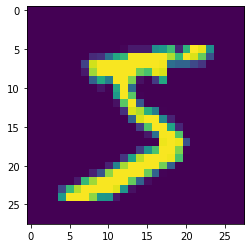

5


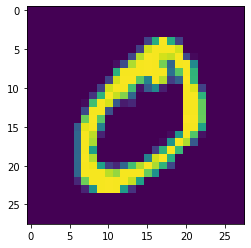

0


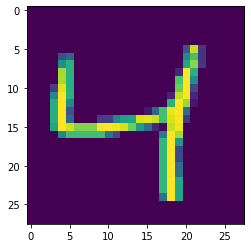

4


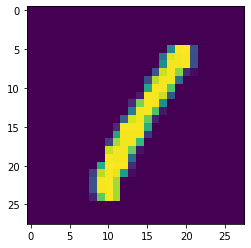

1


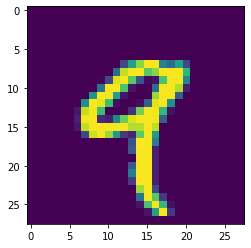

9


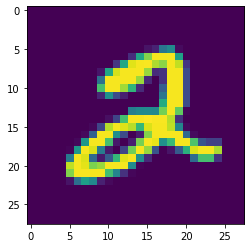

2


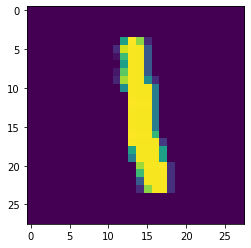

1


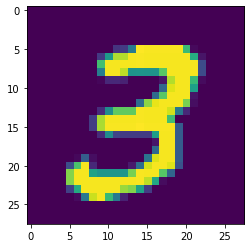

3


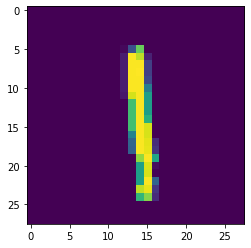

1


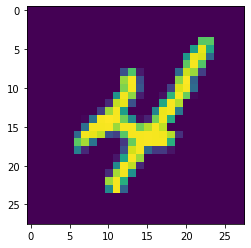

4


In [6]:
import matplotlib.pyplot as plt
for i in range(10):
  plt.imshow(X_train[i])
  plt.show()
  print(y_train[i])


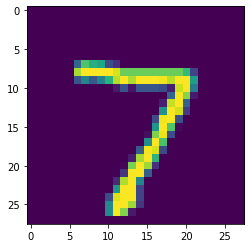

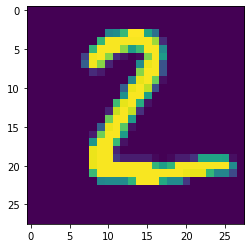

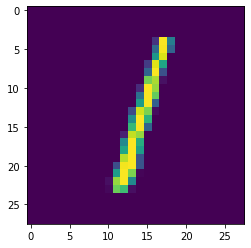

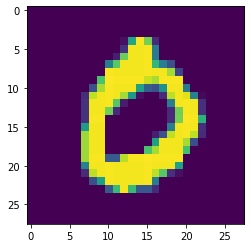

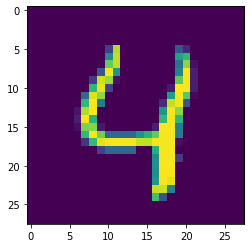

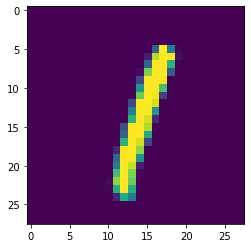

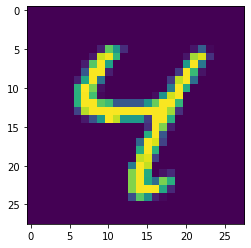

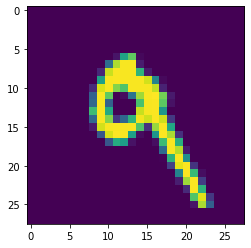

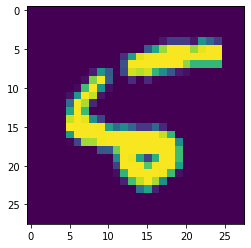

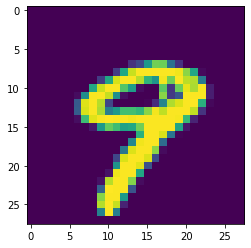

In [7]:
for i in range(10):
  plt.imshow(X_test[i])
  plt.show()

In [39]:
# Flattening the images from the 28x28 pixels to 1D 784 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [40]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [41]:
X_train[0:10,1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [42]:
## Target Classes
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [43]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [44]:
# building a linear stack of layers with the sequential model
model = Sequential()
# hidden layer
model.add(Dense(100, input_shape=(784,), activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

In [45]:
# looking at the model summary
model.summary()
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 1.8694 - accuracy: 0.5659 - val_loss: 1.2827 - val_accuracy: 0.7261
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.9828 - accuracy: 0.7861 - val_loss: 0.7529 - val_accuracy: 0.8317
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.6552 - accuracy: 0.8446 - val_loss: 0.5547 - val_accuracy: 0.8672
Epoch 4/10
469/469 [

In [46]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3101 - accuracy: 0.9130


[0.31012436747550964, 0.9129999876022339]

### Using Convolution Layer

In [50]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [51]:
print(X_train.shape)

(60000, 28, 28)


In [52]:
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [53]:
print(X_train.shape)

(60000, 28, 28, 1)


In [54]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [55]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [57]:
# building a linear stack of layers with the sequential model
model = Sequential()

In [58]:
# convolutional layer
model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

In [59]:
# flatten output of conv
model.add(Flatten())

In [60]:
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

In [61]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [62]:
# training the model for 10 epochs
callback = model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 5s 9ms/step - loss: 0.1785 - accuracy: 0.9481 - val_loss: 0.0578 - val_accuracy: 0.9826
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0474 - accuracy: 0.9855 - val_loss: 0.0416 - val_accuracy: 0.9866
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0305 - accuracy: 0.9907 - val_loss: 0.0315 - val_accuracy: 0.9898
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0225 - accuracy: 0.9924 - val_loss: 0.0316 - val_accuracy: 0.9893
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0170 - accuracy: 0.9944 - val_loss: 0.0295 - val_accuracy: 0.9912
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0121 - accuracy: 0.9958 - val_loss: 0.0385 - val_accuracy: 0.9888
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0099 - accuracy: 0.9967 - val_loss: 0.0343 - val_accuracy: 0.9893
Epoch 

In [63]:
import matplotlib.pyplot as plt

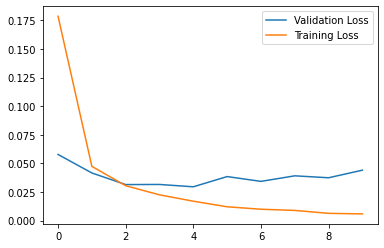

In [64]:
plt.plot(callback.history['val_loss'],label='Validation Loss');
plt.plot(callback.history['loss'],label='Training Loss');
plt.legend();

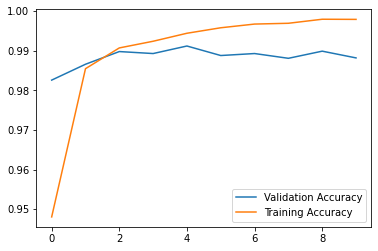

In [65]:
plt.plot(callback.history['val_accuracy'],label='Validation Accuracy');
plt.plot(callback.history['accuracy'],label='Training Accuracy');
plt.legend();

In [66]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0440 - accuracy: 0.9882


[0.04404403641819954, 0.9882000088691711]

In [67]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [28]:
y_pred[:5]

array([[6.34554258e-13, 8.49056177e-13, 6.95994040e-10, 4.86376841e-08,
        3.30223869e-12, 3.01975293e-15, 1.23726501e-20, 1.00000000e+00,
        3.09895398e-09, 1.24980113e-11],
       [3.01833916e-13, 5.59678632e-08, 1.00000000e+00, 2.14274613e-16,
        1.05627105e-15, 1.46762644e-18, 1.57659441e-11, 1.30156128e-16,
        6.81610483e-16, 1.72274352e-16],
       [2.07021156e-09, 9.99998093e-01, 1.21079635e-08, 2.57149065e-13,
        5.33706668e-07, 1.99631686e-10, 1.22652233e-09, 3.10237226e-07,
        1.06076288e-06, 7.07608939e-13],
       [9.99999881e-01, 3.80965155e-11, 4.14279860e-11, 3.63766065e-13,
        3.05846667e-12, 6.60053869e-12, 6.37390656e-08, 2.64243471e-11,
        2.30501979e-10, 9.61692148e-09],
       [1.29581456e-16, 4.46106758e-15, 9.16596443e-13, 4.88289665e-16,
        1.00000000e+00, 3.42340817e-15, 5.13702037e-14, 2.14636014e-14,
        1.14646316e-13, 3.44490303e-09]], dtype=float32)

In [29]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [68]:
y_predictions = np.argmax(np.round(y_pred,3),axis=1)

In [ ]:
y_

In [71]:
import numpy as np
print("Test Accuracy : ", round(np.mean(np.argmax(np.round(y_pred,3),axis=1) == y_test),2))

Test Accuracy :  0.99


In [69]:
from sklearn.metrics import classification_report

In [70]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [31]:
model.evaluate(X_train, Y_train)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0044 - accuracy: 0.9985


[0.004364428110420704, 0.998533308506012]